# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">1. EDA for Gemstone Dataset - Utkarsh Gaikwad</p>

### Introduction About the Data :

**The dataset** The goal is to predict `price` of given diamond (Regression Analysis).

There are 10 independent variables (including `id`):

* `id` : unique identifier of each diamond
* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimension

Target variable:
* `price`: Price of the given Diamond.

Dataset Source Link :
[https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv](https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv)

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Read the Dataset</p>

### Read Dataset

In [2]:
import pandas as pd
df = pd.read_csv("./data/gemstone.csv")
df=df.set_index('id')
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


### Dataset Info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 16.2+ MB


### Drop id column as it is statistically insignificant

In [13]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [11]:
df=df.reset_index(drop=True)

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Check Missing Values in Dataset</p>

In [15]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

### No Missing Values found in the dataset

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Check Duplicates in Dataset</p>

In [16]:
df.duplicated().sum()

0

### No Duplicated data found

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Descriptive Statistics</p>

### Numerical and Categorical columns seperation

In [47]:
numerical_columns=[cat for cat in df.columns if df[cat].dtype !="object"]
categorical_columns=[cat for cat in df.columns if df[cat].dtype =="object"]



In [48]:
print(f'Numerical Columns   : {numerical_columns}')
print(f'Categorical Columns : {categorical_columns}')

Numerical Columns   : ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
Categorical Columns : ['cut', 'color', 'clarity']


### Numerical Columns Description

In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


### Categorical Columns Description

In [8]:
df[categorical_columns].describe().T

,count,unique,top,freq
cut,193573,5,Ideal,92454
color,193573,7,G,44391
clarity,193573,8,SI1,53272


In [73]:
for col in df[categorical_columns]:
    print(f"the {col} has {df[col].nunique()} categories , which are {df[col].unique()} ")

the cut has 5 categories , which are ['Premium' 'Very Good' 'Ideal' 'Good' 'Fair'] 
the color has 7 categories , which are ['F' 'J' 'G' 'E' 'D' 'H' 'I'] 
the clarity has 8 categories , which are ['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1'] 


### All unique values in dataset

In [9]:
df.nunique()

carat       248
cut           5
color         7
clarity       8
depth       153
table       108
x           522
y           521
z           349
price      8738
dtype: int64

### Note that cut , color and clarity are ordinal features in dataset.

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Univariate Analysis with Visualisation</p>

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt


### Univariate Analysis of Numerical Variables

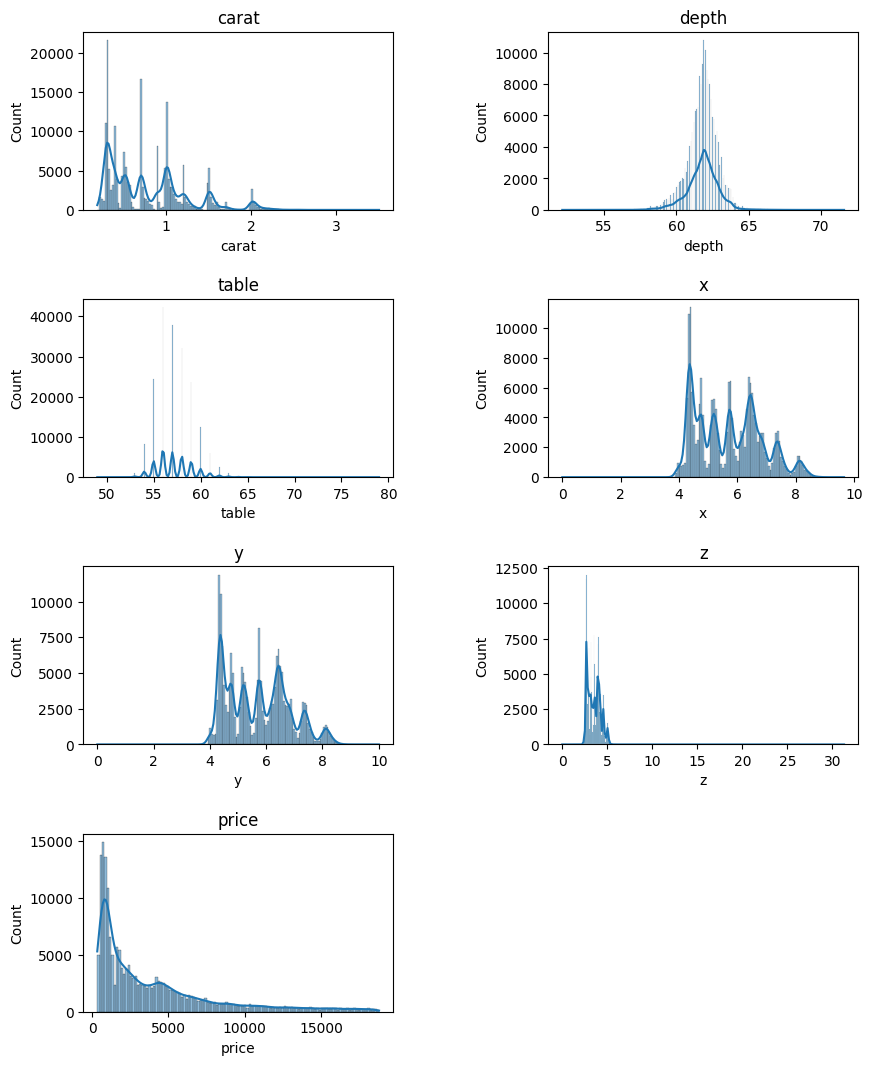

In [78]:

plt.figure(figsize=(10, 10))
plt.subplots_adjust(top=0.99, bottom=0.01, hspace=0.5, wspace=0.5)

# Number of numerical columns
num_plots = len(numerical_columns)
rows = (num_plots // 2) + 1  # Adjust rows dynamically

for idx, col in enumerate(numerical_columns, 1):  
    plt.subplot(rows, 2, idx)  # Create subplot grid (rows x 3)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.show()  # Show all plots together

### Univariate analysis for categorical variables

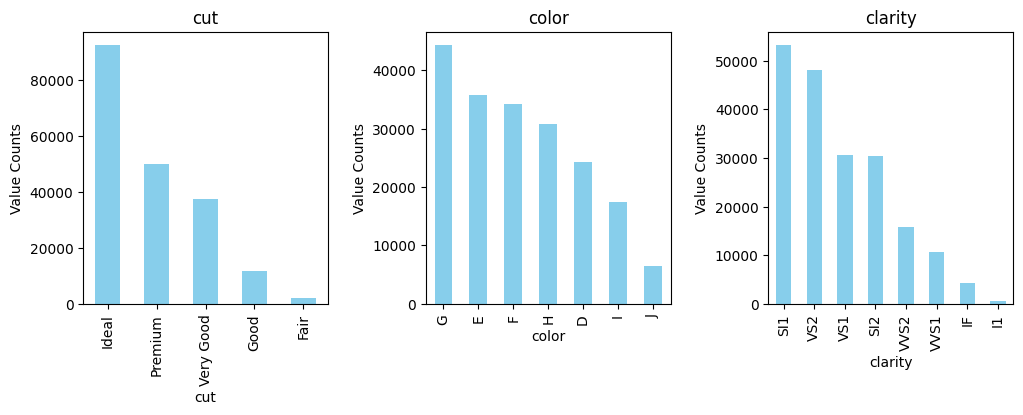

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=0.95, bottom=0.1, hspace=0.5, wspace=0.4)

num_plots = len(categorical_columns)
rows = (num_plots // 3) + 1  # Adjust the number of rows dynamically

for idx, col in enumerate(categorical_columns, 1):
    plt.subplot(rows, 3, idx)  # Create a grid layout with 3 columns
    df[col].value_counts().plot(kind='bar', color='skyblue')
    plt.xlabel(col)
    plt.ylabel("Value Counts")
    plt.title(col)

plt.show()  # Show all plots together


# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Bivariate Analysis with Visualisation</p>

### Correlation heatmap

e:\Mlop\Gemstone_Price_Prediction_\Nenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


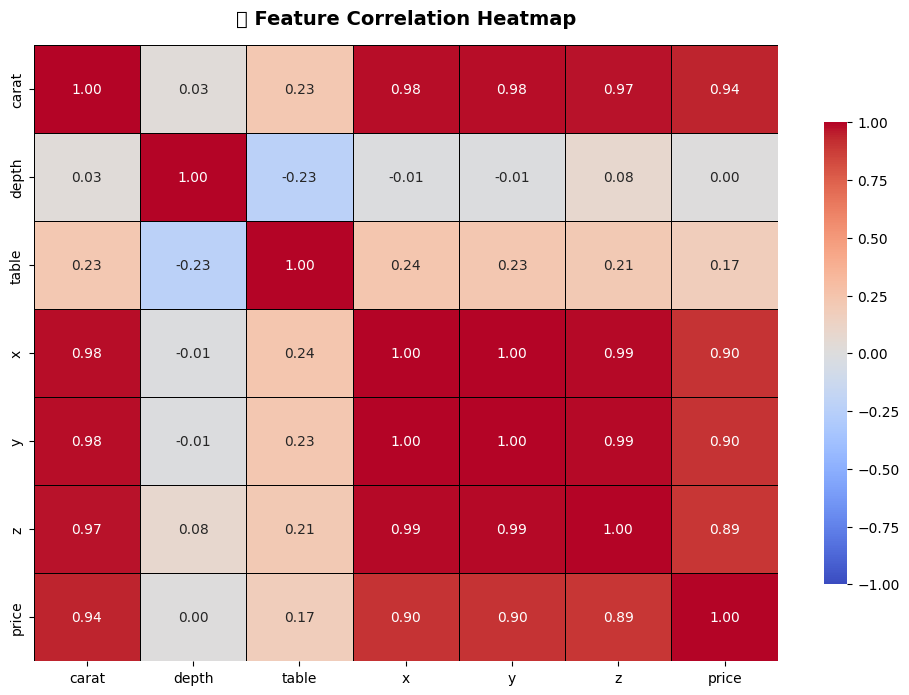

In [90]:
plt.figure(figsize=(12, 8))

# Create the heatmap with better styling
sns.heatmap(
    df.corr(numeric_only=True), 
    annot=True,           # Show correlation values
    fmt=".2f",            # Format values to 2 decimal places
    cmap="coolwarm",      # Color theme (blue-red)
    linewidths=0.5,       # Add grid lines between cells
    linecolor='black',    # Grid color
    annot_kws={"size": 10},  # Adjust annotation text size
    vmin=-1, vmax=1,      # Fix color scale from -1 to 1
    cbar_kws={"shrink": 0.75}  # Shrink color bar for better fit
)

# Add title with styling
plt.title("🔍 Feature Correlation Heatmap", fontsize=14, fontweight='bold', pad=15)

# Show the plot
plt.show()

In [91]:
df[numerical_columns]

,carat,depth,table,x,y,z,price
0,1.52,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,61.6,56.0,4.38,4.41,2.71,666
4,1.70,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...
193568,0.31,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,62.9,55.0,4.45,4.49,2.81,681


### Pairplot

<Figure size 1200x1000 with 0 Axes>

e:\Mlop\Gemstone_Price_Prediction_\Nenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


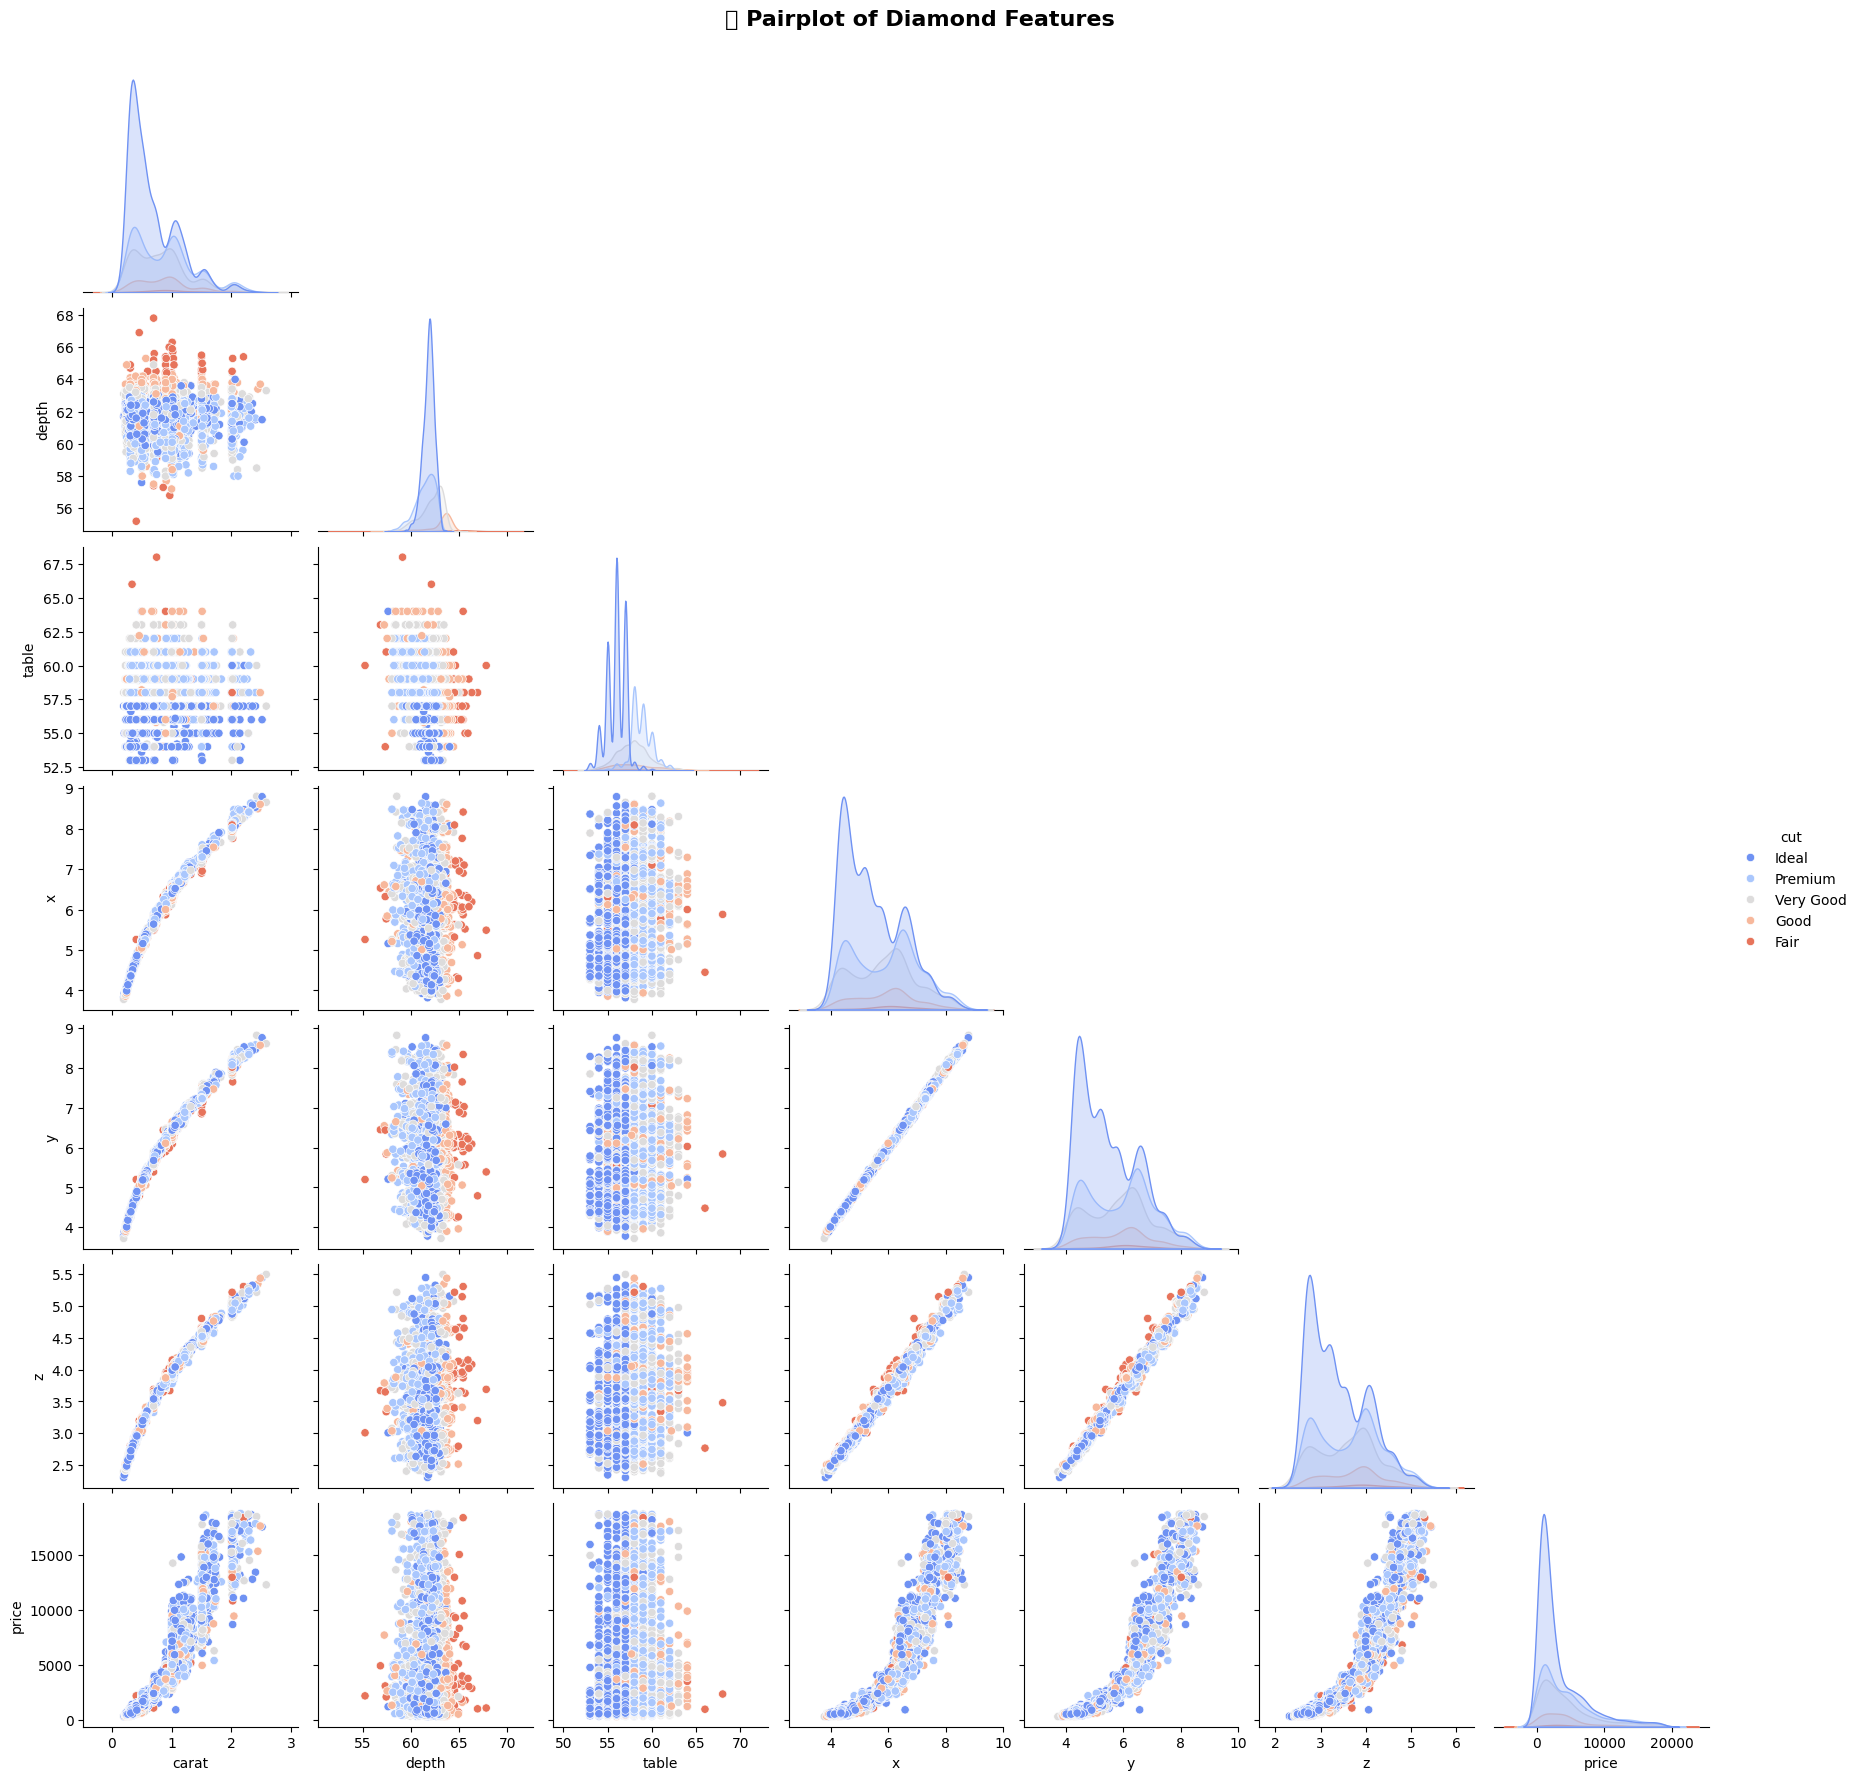

In [97]:
plt.figure(figsize=(12, 10))

# Create the pairplot with KDE on the diagonal
sns.pairplot(
    df.sample(5000),
    diag_kind='kde',        # Use Kernel Density Estimation on diagonal
    # plot_kws={'alpha': 0.7}, # Transparency for scatter plots
    height=2.5,             # Adjust size of individual plots
    hue='cut',              # Color points based on a categorical variable
    palette='coolwarm',     # Color palette for hue
    corner=True             # Remove upper triangle to reduce clutter
)

# Add a title
plt.suptitle("🔍 Pairplot of Diamond Features", fontsize=16, fontweight='bold', y=1.02)

# Show the plot
plt.show()
plt.show()

## Categorical Features vs Target Feature Price Boxplot

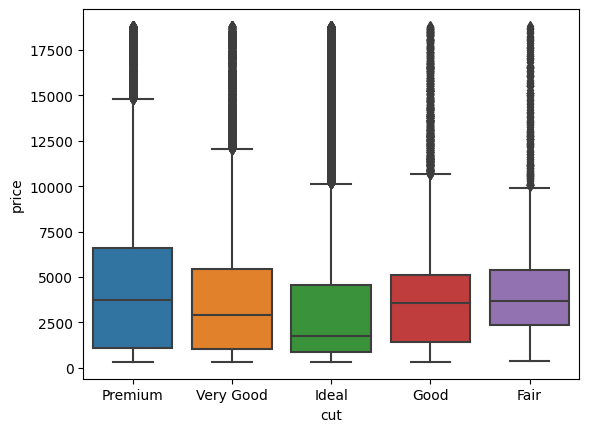

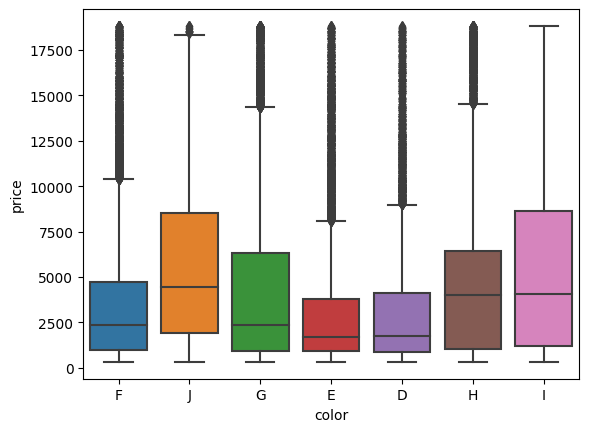

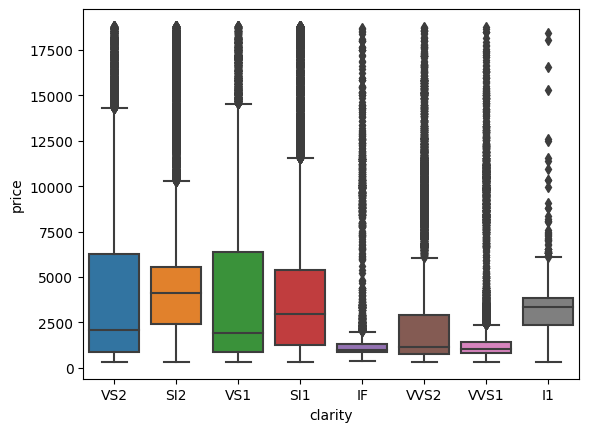

In [14]:
for i in categorical_columns:
    sb.boxplot(data=df, x=i , y='price')
    plt.show()

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Ordinal Mapping of categorical features</p>

### It is observed that the categorical variables 'cut', 'color' and 'clarity' are ordinal in nature

### Check this link for details : [American Gem Society](https://www.americangemsociety.org/ags-diamond-grading-system/)

### Creating Mapper for each categorical variable

In [98]:
x=df[categorical_columns]

In [99]:
x

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
193568,Ideal,D,VVS2
193569,Premium,G,VVS2
193570,Very Good,F,SI1
193571,Very Good,D,SI1


In [102]:
x

,cut,color,clarity
0,3.0,2.0,5.0
1,4.0,6.0,3.0
2,2.0,3.0,4.0
3,2.0,3.0,4.0
4,3.0,3.0,5.0
...,...,...,...
193568,2.0,0.0,7.0
193569,3.0,3.0,7.0
193570,4.0,2.0,2.0
193571,4.0,0.0,2.0


In [103]:
cut_mapper = {"Fair":1, "Good":2, "Very Good":3 , "Premium":4 ,"Ideal":5}
clarity_mapper = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_mapper = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

### Applying the mapper to the dataframe

In [104]:
df['cut'] = df['cut'].replace(cut_mapper)
df['clarity'] = df['clarity'].replace(clarity_mapper)
df['color'] = df['color'].replace(color_mapper)

C:\Users\User\AppData\Local\Temp\ipykernel_3196\3611225572.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['cut'] = df['cut'].replace(cut_mapper)
C:\Users\User\AppData\Local\Temp\ipykernel_3196\3611225572.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['clarity'] = df['clarity'].replace(clarity_mapper)
C:\Users\User\AppData\Local\Temp\ipykernel_3196\3611225572.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `resu

In [105]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Mutual Information Scores</p>

### Seperating X and Y

In [106]:
X = df.drop(labels=['price'],axis=1)
Y = df[['price']]

### Calculating Mutual Information scores for regression

In [107]:
from sklearn.feature_selection import mutual_info_regression
mi_scores = mutual_info_regression(X,Y.values.flatten(),random_state=42)
mi_scores = pd.Series(mi_scores, name="MI Scores",index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

In [114]:
import numpy as np

In [115]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=scores, y=ticks, palette="coolwarm")  # Use color gradient

    plt.xlabel("Mutual Information Score", fontsize=12, fontweight='bold')
    plt.ylabel("Features", fontsize=12, fontweight='bold')
    plt.title("Mutual Information Scores", fontsize=14, fontweight='bold')
    
    plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add a light grid for clarity

    # Add value labels
    for index, value in enumerate(scores):
        plt.text(value + 0.005, index, f"{value:.3f}", va='center', fontsize=10)

    plt.show()


### Visualizing Mutual Information Scores

carat      1.825115
x          1.674011
y          1.666632
z          1.615992
clarity    0.397911
color      0.285518
table      0.109664
cut        0.092104
depth      0.045643
Name: MI Scores, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_3196\203196456.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=ticks, palette="coolwarm")  # Use color gradient


<Figure size 800x500 with 0 Axes>

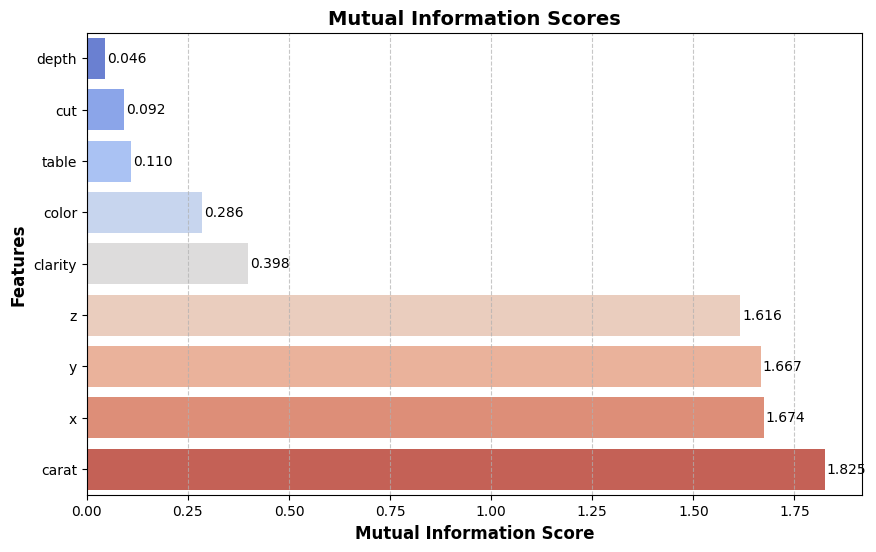

In [116]:
print(mi_scores)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

### Conclusion : Above shows that carat and x, y, z are most important features to predict the price of a gemstone